# Data Exploration for Trace Clustering

# Introduction
In this notebook, we will explore and visualize real event logs. 
We will load, decompress, and parse the logs, followed by data exploration and visualization.


In [9]:
# Loading the Event Logs
import pm4py

def load_event_log(path):
    return pm4py.read_xes(path)

event_log_paths = [
    '../shared/example_files/CoSeLoG-WABO-4.xes'
    # Add more paths for other event logs if available
]

logs = [load_event_log(path) for path in event_log_paths]

parsing log, completed traces ::   0%|          | 0/787 [00:00<?, ?it/s]

# Parsing the Event Logs
In this section, we will parse the event logs using the pm4py library.

In [10]:
# Converting logs to DataFrames for easier manipulation
import pandas as pd

def convert_log_to_dataframe(log):
    return pm4py.convert_to_dataframe(log)

dataframes = [convert_log_to_dataframe(log) for log in logs]

# Data Exploration
We will explore the event logs to understand the structure and content of the data.

In [11]:
# Example exploration on the first log
df = dataframes[0]

# Event Count
total_events = df.shape[0]
print(f"Total number of events: {total_events}")

# Unique Activities
unique_activities = df['concept:name'].nunique()
print(f"Number of unique activities: {unique_activities}")

# Timeframe
df['time:timestamp'] = pd.to_datetime(df['time:timestamp'])
timeframe_start = df['time:timestamp'].min()
timeframe_end = df['time:timestamp'].max()
print(f"Timeframe: {timeframe_start} to {timeframe_end}")

Total number of events: 34848
Number of unique activities: 330
Timeframe: 2009-11-18 00:00:00+00:00 to 2013-12-30 10:26:30+00:00


# Visualization
We will create visualizations to better understand the distribution and trends in the event logs.

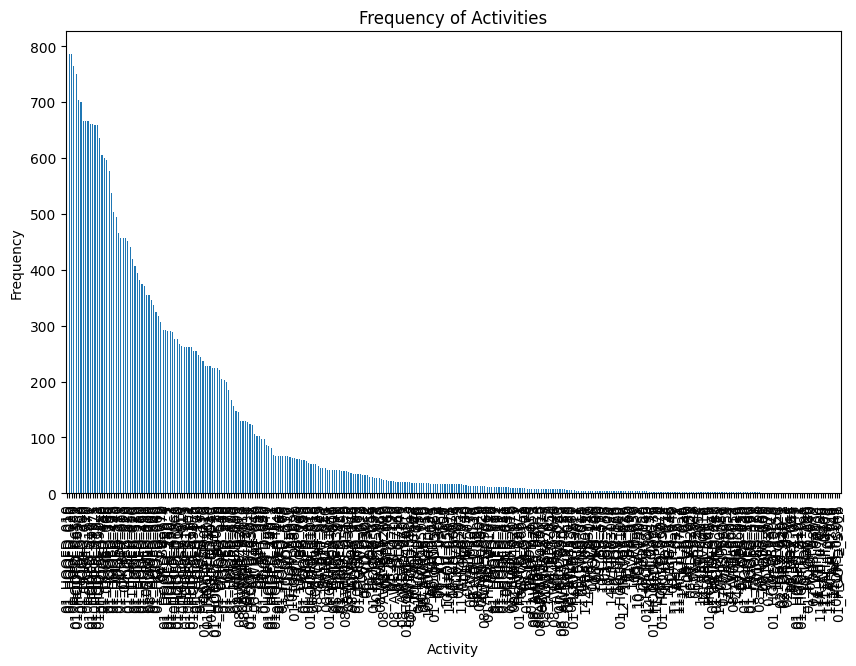

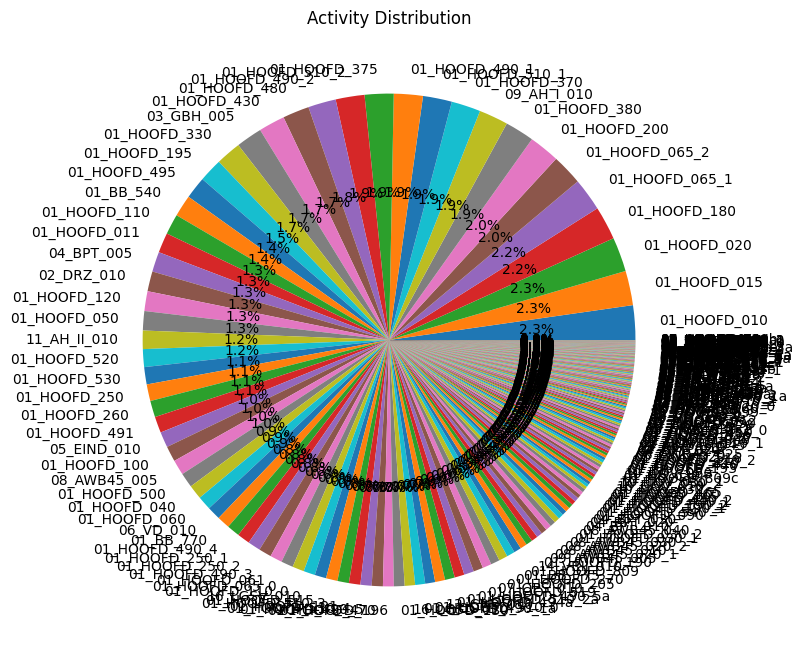

/var/folders/sb/h3gzchyd3m31hqv8rp5kbrzr0000gn/T/ipykernel_74184/1034573517.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  events_over_time = df.resample('M', on='time:timestamp').size()


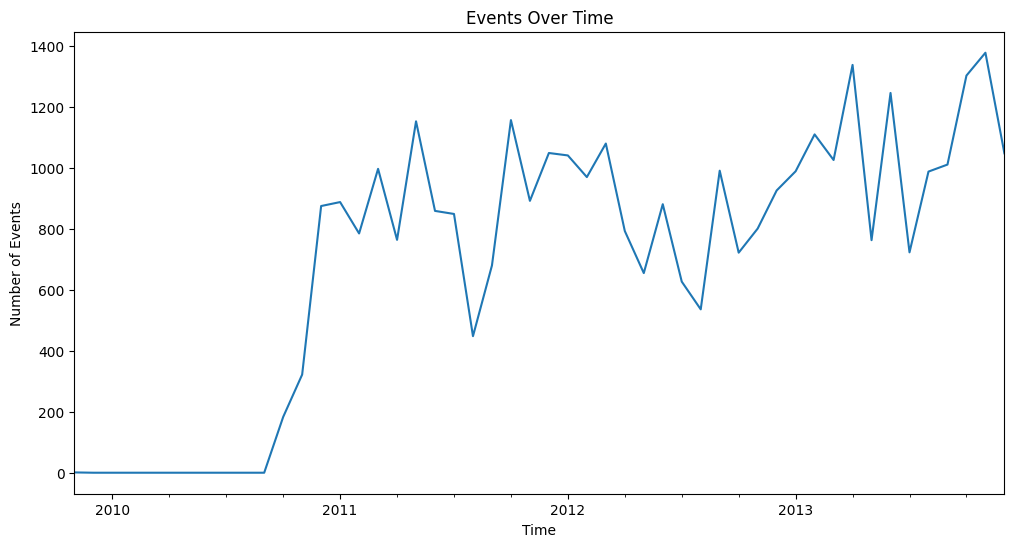

In [12]:
import matplotlib.pyplot as plt

# Bar Chart for Activity Frequency
activity_counts = df['concept:name'].value_counts()
plt.figure(figsize=(10, 6))
activity_counts.plot(kind='bar')
plt.title('Frequency of Activities')
plt.xlabel('Activity')
plt.ylabel('Frequency')
plt.show()

# Pie Chart for Activity Distribution
plt.figure(figsize=(8, 8))
activity_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Activity Distribution')
plt.ylabel('')
plt.show()

# Line Chart for Events Over Time
events_over_time = df.resample('M', on='time:timestamp').size()
plt.figure(figsize=(12, 6))
events_over_time.plot(kind='line')
plt.title('Events Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Events')
plt.show()